In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/swapnasavalgi/Tableau/main/netflix_titles.csv'

In [3]:
data = pd.read_csv(url)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Country Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [8]:
country = data['country'].value_counts().reset_index().head(10)
country = pd.DataFrame(country)
country

,index,country
0,United States,1846
1,India,875
2,United Kingdom,183
3,Canada,107
4,Spain,91
5,Egypt,90
6,Nigeria,88
7,Japan,83
8,Turkey,79
9,Indonesia,76


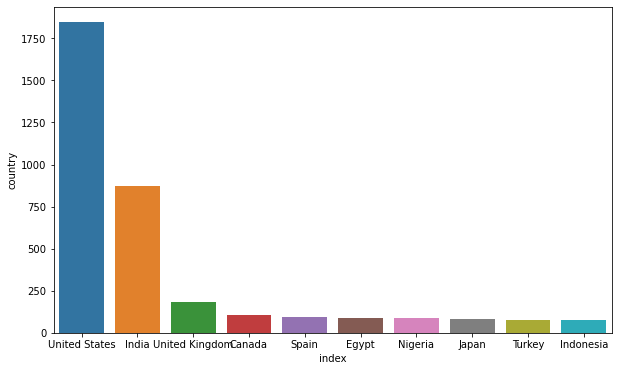

In [9]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.barplot(x='index', y = 'country',data= country)
plt.show()

Release Year

In [10]:
release_year = data['release_year'].value_counts().reset_index().head()
release_year = pd.DataFrame(release_year)
release_year

,index,release_year
0,2017,657
1,2018,648
2,2016,577
3,2019,519
4,2020,442


<AxesSubplot:xlabel='index', ylabel='release_year'>

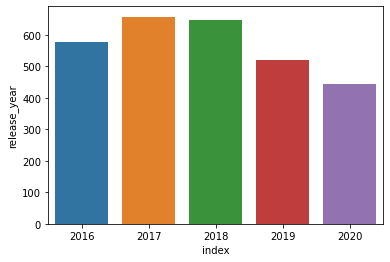

In [11]:
sns.barplot(x = "index", y = "release_year", data =release_year)

Type

In [12]:
movies_tv_shows = data['type'].value_counts().reset_index()
movies_tv_shows = pd.DataFrame(movies_tv_shows)
movies_tv_shows

,index,type
0,Movie,5185
1,TV Show,147


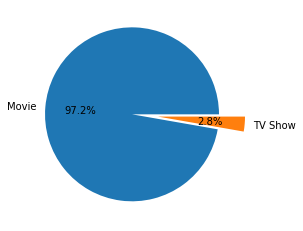

In [13]:
plt.pie(movies_tv_shows['type'], labels =['Movie','TV Show'], explode = [0.1,0.2], autopct = '%1.1f%%' );

GENRE

In [14]:
genre = data['listed_in'].value_counts().reset_index()
genre = pd.DataFrame(genre)
genre

,index,listed_in
0,"Dramas, International Movies",336
1,Stand-Up Comedy,286
2,"Comedies, Dramas, International Movies",257
3,"Dramas, Independent Movies, International Movies",243
4,"Children & Family Movies, Comedies",179
...,...,...
330,"Kids' TV, TV Action & Adventure",1
331,"Crime TV Shows, TV Dramas, TV Mysteries",1
332,"Dramas, Horror Movies, Thrillers",1
333,"Children & Family Movies, Comedies, LGBTQ Movies",1


In [15]:
#connverting upper-lower case
genre['index'] = genre['index'].apply(lambda x: " ".join(x.lower() for x in x.split(',')))

In [16]:
#removing punctuation

genre['index'] = genre['index'].str.replace("[^\w\s]","")
genre['index'] 

<ipython-input-16-f85403e69af1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  genre['index'] = genre['index'].str.replace("[^\w\s]","")


0                          dramas  international movies
1                                        standup comedy
2                comedies  dramas  international movies
3      dramas  independent movies  international movies
4                     children  family movies  comedies
                             ...                       
330                       kids tv  tv action  adventure
331             crime tv shows  tv dramas  tv mysteries
332                    dramas  horror movies  thrillers
333     children  family movies  comedies  lgbtq movies
334     action  adventure  documentaries  sports movies
Name: index, Length: 335, dtype: object

In [17]:
# removing unneccessary word
sentences = ['tv', 'international', 'tv', 'korean', 'shows', '&', 'movies', 'independent']
genre['index'] = genre['index'].apply(lambda x: " ".join(x for x in x.split() if x not in sentences))

In [18]:
genre['index']

0                                     dramas
1                             standup comedy
2                            comedies dramas
3                                     dramas
4                   children family comedies
                       ...                  
330                    kids action adventure
331                   crime dramas mysteries
332                  dramas horror thrillers
333           children family comedies lgbtq
334    action adventure documentaries sports
Name: index, Length: 335, dtype: object

In [19]:
# count words
genre = pd.Series(" ".join(genre['index']).split()).value_counts().reset_index()
#genre1 = pd.DataFrame(genre, columns = ['index'])
genre

,index,0
0,dramas,99
1,comedies,89
2,adventure,74
3,action,74
4,romantic,46
5,fantasy,42
6,scifi,42
7,children,40
8,horror,40
9,family,40


In [21]:
genre1 = genre.head()
genre1

,index,0
0,dramas,99
1,comedies,89
2,adventure,74
3,action,74
4,romantic,46


<AxesSubplot:xlabel='index', ylabel='0'>

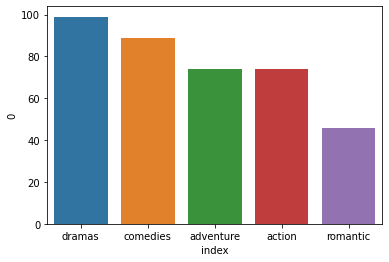

In [25]:
#viewing top 5 category
sns.barplot(x = 'index', y = 0,data = genre1)

In [39]:
date_added = pd.DataFrame(data['date_added']) 
date_added = date_added['date_added'].str.split(',',expand = True)
date_added = pd.DataFrame(date_added[1])
date_added = pd.DataFrame(date_added.value_counts()).reset_index().head(10)
date_added

,1,0
0,2019,1265
1,2020,1194
2,2018,1101
3,2021,755
4,2017,724
5,2016,202
6,2015,50
7,2014,14
8,2011,13
9,2013,7


In [44]:
date_added = date_added.rename(columns = {1:'Year', 0:'Total'})

<AxesSubplot:xlabel='Year', ylabel='Total'>

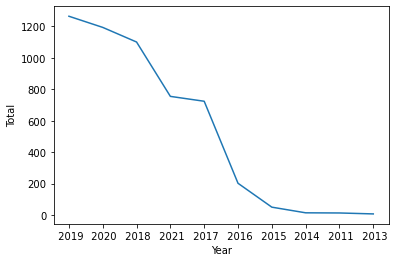

In [45]:
sns.lineplot(data = date_added, x = 'Year', y = 'Total')